In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [ ]:
import pandas as pd
np.random.seed(123)

import warnings
warnings.filterwarnings('ignore')

## Validación del modelo

Al entrenar un modelo, el uso de diferentes parámetros puede conducir a una solución muy diferente. Con el fin de evitar minimizar el error, que no siempre es un buen punto de partida, creamos una solución de **conjunto de validación**, que nos sirve para validar la selección de parámetros. Difiere del **conjunto de prueba o test** que este sirve solo para validar la calidad del modelo.

![](https://miro.medium.com/max/1552/1*Nv2NNALuokZEcV6hYEHdGA.png)

In [ ]:
# Cargamos los datos
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


$Sales ~ (TV+Radio+Newspaper)=$ \\
$= Sales = f(TV+Radio+Newspaper)$

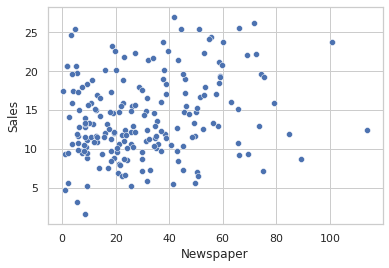

In [ ]:
sns.scatterplot(x=df.Newspaper, y=df['Sales'])

$Y = m * X + n $  

$ Sales = m * TV + n$

In [ ]:
# Realizando las predicciones con dos coeficientes
df['prediction_1'] = 0.1 * df.TV
df['prediction_2'] = 0.12 * df.TV + 10
df.head()

,TV,Radio,Newspaper,Sales,prediction_1,prediction_2
0,230.1,37.8,69.2,22.1,23.01,37.612
1,44.5,39.3,45.1,10.4,4.45,15.340
2,17.2,45.9,69.3,9.3,1.72,12.064
3,151.5,41.3,58.5,18.5,15.15,28.180
4,180.8,10.8,58.4,12.9,18.08,31.696


In [ ]:
# Analizamos los errores
df['error_1'] = (df.Sales - df.prediction_1).abs()
df['error_2'] = (df.Sales - df.prediction_2).abs()
df.head(10)

,TV,Radio,Newspaper,Sales,prediction_1,prediction_2,error_1,error_2
0,230.1,37.8,69.2,22.1,23.01,37.612,0.91,15.512
1,44.5,39.3,45.1,10.4,4.45,15.340,5.95,4.940
2,17.2,45.9,69.3,9.3,1.72,12.064,7.58,2.764
3,151.5,41.3,58.5,18.5,15.15,28.180,3.35,9.680
4,180.8,10.8,58.4,12.9,18.08,31.696,5.18,18.796
5,8.7,48.9,75.0,7.2,0.87,11.044,6.33,3.844
6,57.5,32.8,23.5,11.8,5.75,16.900,6.05,5.100
7,120.2,19.6,11.6,13.2,12.02,24.424,1.18,11.224
8,8.6,2.1,1.0,4.8,0.86,11.032,3.94,6.232
9,199.8,2.6,21.2,10.6,19.98,33.976,9.38,23.376


In [ ]:
# Promedio error 1
df.error_1.mean()

4.513450000000001

In [ ]:
df.error_2.mean()

13.622599999999998

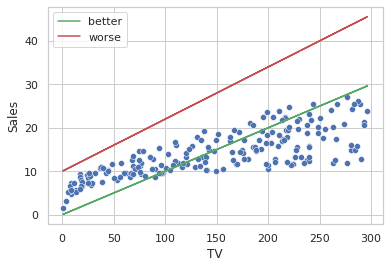

In [ ]:
# representación de los modelos
fig, ax = plt.subplots()
sns.scatterplot(x=df.TV, y=df.Sales)
plt.plot(df.TV, df.prediction_1, color='g', label='better')
plt.plot(df.TV, df.prediction_2, color='r', label='worse')
plt.legend()

Si buscamos el coeficiente que mejor se ajusta al modelo:

$ Sales = m * TV + n $

$ Sales = m_1 * TV + m_2 * Radio + m_3 * Newspaper + n $

In [ ]:
# necesit

In [ ]:
# Realizamos el split Target y Predictores
X = df.drop('Sales', axis=1)
y = df['Sales']

In [ ]:
X.shape, y.shape

((200, 3), (200,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Realizamos el split del conjunto de entrenamiento / validación / test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=123)

In [ ]:
X_train.shape, y_train.shape

((160, 3), (160,))

In [ ]:
X_test.shape, y_test.shape

((40, 3), (40,))

In [ ]:
# Creamos el conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.20,
                                                  random_state=123)

In [ ]:
X_train.shape, y_train.shape

((128, 3), (128,))

In [ ]:
X_val.shape, y_val.shape

((32, 3), (32,))

## Realizamos la tarea de seleccionar el mejor modelo para la validación

Maximizar el `alpha`

In [ ]:
regularization_space = np.linspace(0, 10, 100)
regularization_space

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [ ]:
# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [ ]:
validation_score = []
for a in regularization_space:
  lasso = Lasso(alpha=a)
  lasso.fit(X_train, y_train)
  score = lasso.score(X_val, y_val)
  validation_score.append(score)

In [ ]:
validation_score

[0.8972874233883169,
 0.8977508091857013,
 0.8982043022908923,
 0.8986406077245218,
 0.8990713782421746,
 0.8994964104756192,
 0.8999157044248557,
 0.9003292600898841,
 0.9007370774707042,
 0.9011391565673161,
 0.9015354973797198,
 0.9019260999079155,
 0.9023109641519028,
 0.902690090111682,
 0.903063477787253,
 0.9034311271786158,
 0.9037930382857705,
 0.904149211108717,
 0.9044996456474553,
 0.9048443419019855,
 0.9051832998723074,
 0.905516519558421,
 0.9058440009603266,
 0.9061657440780241,
 0.9064817489115132,
 0.9067920154607941,
 0.907096543725867,
 0.9073953337067318,
 0.9076883854033881,
 0.9079756988158365,
 0.9082572739440765,
 0.9085331107881085,
 0.9088032093479322,
 0.9090675696235477,
 0.9093261916149551,
 0.9095790753221543,
 0.9098262207451453,
 0.9100676278839283,
 0.9103032967385029,
 0.9105332273088693,
 0.9107574195950275,
 0.9109758735969776,
 0.9111885893147196,
 0.9113955667482533,
 0.9115968058975787,
 0.9117923067626962,
 0.9119820693436054,
 0.912166093640306

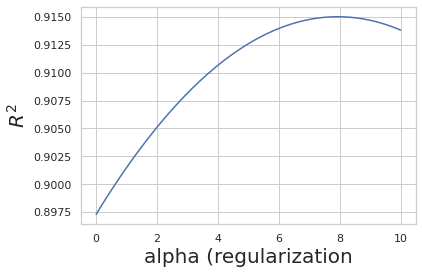

In [ ]:
plt.plot(regularization_space, validation_score)
plt.xlabel('alpha (regularization', size=20)
plt.ylabel(f'$R^2$', size=20)
plt.show()

In [ ]:
alpha_val = regularization_space[validation_score.index(max(validation_score))]
alpha_val

7.979797979797979

In [ ]:
# Comprobamos si el resultado de la regularización del alpha, obtenemos el % estimado de un 91,5%
X_train = pd.concat([X_train, X_val], axis=0)
y_train = pd.concat([y_train, y_val], axis=0)

In [ ]:
# Aplicamos la regularización del alpha obtenido anteriormente alpha_val 7.978
lasso = Lasso(alpha=alpha_val)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.9140719891117921

## Aplicar la lógica de entrenamiento

- k-fold Cross Validation


In [ ]:
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

In [ ]:
# Aplicamos k al nuestro dataset
K_fold = StratifiedKFold(n_splits=5)

# indicamos el random state
random_state = 17

# Paso para generar de forma conjunta un k-fold para diferentes estimadores
models = []
cv_results = []
cv_means = []
cv_std = []

# generamos los modelos


In [ ]:
# Utilizamos statsmodel
results = smf.ols('Sales ~ TV+Radio', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           4.83e-98
Time:                        20:06:13   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""